> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Research Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## Dataset
**Source**: [Gapminder](https://www.gapminder.org/data/) has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. From their list of 500+ indicators, the following indicators related to women literacy and engagement in society peeked my interest:

1. Literacy rate, adult female (% of females ages 15 and above)
    * Adult literacy rate is the percentage of people ages 15 and above who can, with understanding, read and write a short, simple statement on their everyday life
2. Mean years in school (women of reproductive age, 15 to 44)
    * The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education. 
3. Mean age at 1st marriage of women
    * The average age, in years, of first marriage for women. Women who never married are excluded. Cohabitation is excluded
4. Age 15-64 Female Labor to population (%)
    * For age group 15-64, percentage of female labor to total female population.
5. Under-Five Mortality rate (per 1,000 live births)
    * The probability that children born in a specific year will die before reaching the age of five, if the age-specific mortality rates remain the same.

## Background
Since Gapminder has data on more than 500 indicators ranging in economy, population, health, etc. it is crucial to have a topic of interest prior to choosing indicators. 

I was interested in looking at factors related to females, specifically indicators related to women literacy, autonomy and engagement in society. 

### Factors
The main independent factors explored are adult female literacy rate and mean years in school. The effect of women literacy on mean age at first marriage is explored along with the cumulative effect of all these factors on female labor participation in the economy. 

The final factor explored in Child Mortality Rate and whether women's rights and autonomy are correlated to the mortality rate in a society.

<a id='questions'></a>
## Research Questions 
The aim of this analysis was to research the following questions:
1. Have certain regions of the world been growing in selected metrics better than others?
2. Does female literacy in a country have an impact on the mean age of females at first marriage? 
3. What factors affect the female labor participation in society, specifically, to what extent does female literacy (indicators 1 and 2) and autonomy (indicator 3) impact female engagement in labor force? 
4. Do factors related to female literacy and autonomy in a society have an effect on the child mortality rate in a country? 

<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

Since the data source for each indicator is different, the countries and years measured vary for each dataset. In order to perform comparative analysis between indicators, substantial data wrangling is required to match countries studied for each indicator and the years measured. 

## General Properties 
General exploration of structure of each dataset to determine required steps for cleanup 

In [554]:
import pandas as pd
import numpy as np
% matplotlib inline

### 1. Mean School Years 

In [555]:
df_school = pd.read_csv('data/mean_years_school_women.csv')
df_school.info()
df_school.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 41 columns):
Row Labels    175 non-null object
1970          175 non-null float64
1971          175 non-null float64
1972          175 non-null float64
1973          175 non-null float64
1974          175 non-null float64
1975          175 non-null float64
1976          175 non-null float64
1977          175 non-null float64
1978          175 non-null float64
1979          175 non-null float64
1980          175 non-null float64
1981          175 non-null float64
1982          175 non-null float64
1983          175 non-null float64
1984          175 non-null float64
1985          175 non-null float64
1986          175 non-null float64
1987          175 non-null float64
1988          175 non-null float64
1989          175 non-null float64
1990          175 non-null float64
1991          175 non-null float64
1992          175 non-null float64
1993          175 non-null float64
1994          175 non

,Row Labels,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,...,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8
1,Albania,5.6,5.7,5.9,6.0,6.2,6.3,6.5,6.6,6.8,...,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7
2,Algeria,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,...,5.8,5.9,6.1,6.2,6.4,6.5,6.7,6.8,6.9,7.1
3,Angola,0.9,1.0,1.0,1.1,1.1,1.2,1.2,1.3,1.4,...,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5
4,Antigua and Barbuda,8.1,8.3,8.5,8.7,8.8,9.0,9.2,9.4,9.6,...,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.3,13.4,13.5


**Observations:**
* Data present for 175 countries for years 1970 - 2009 
* All years contain 175 non-null entries with no missing data for any country for any year

**Next Steps:**
* Extract revelant years data for analysis (determined later)  

### 2. Mean Age at Marriage 

In [556]:
df_marriage = pd.read_csv('data/marriage_age_females.csv')
df_marriage.info()
df_marriage.head()
df_marriage.count()
# Marriage Age Females
# Horrible data, no complete years. only 2005 has full data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Columns: 117 entries, Unnamed: 0 to 2005
dtypes: float64(116), object(1)
memory usage: 169.2+ KB


Unnamed: 0    185
1616            1
1666            1
1685            1
1710            2
1716            1
1735            1
1760            1
1766            1
1775            3
1780            5
1785            1
1791            1
1800            5
1810            1
1815            4
1825            1
1835            1
1840            2
1845            1
1855            1
1860            2
1865            1
1866            1
1870            2
1875            1
1879            1
1880            2
1885            1
1887            1
             ... 
1976           10
1977            8
1978            3
1979           10
1980           19
1981            3
1982            5
1983            1
1984            6
1985            3
1986            2
1987            3
1988            1
1989           11
1990           10
1991            6
1992            2
1993            1
1994            3
1995            1
1996            4
1997            2
1998            2
1999            2
2000      

**Observations:**
* Data present for 185 countries for years starting at year 1616 to 2005
* No year contains data for all 185 countries with year 2005 containing highest number of non-null entries (175)

**Next Steps:**
* Due to extreme amount of missing data for most years, all data except for year 2005 will be dropped. 
* Final dataset will contain mean age of first marriage for year 2005 for 175 countries 

### 3. Female Labor Participation

In [557]:
df_labor = pd.read_csv('data/female_labour_participation_rate.csv')
df_labor.info()
df_labor.head()
# Clean data with no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 29 columns):
Female 15-64 labour to population (%)    189 non-null object
1980                                     189 non-null float64
1981                                     189 non-null float64
1982                                     189 non-null float64
1983                                     189 non-null float64
1984                                     189 non-null float64
1985                                     189 non-null float64
1986                                     189 non-null float64
1987                                     189 non-null float64
1988                                     189 non-null float64
1989                                     189 non-null float64
1990                                     189 non-null float64
1991                                     189 non-null float64
1992                                     189 non-null float64
1993                        

,Female 15-64 labour to population (%),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,31.100000,30.900000,30.700001,30.500000,30.400000,30.200001,30.000000,29.900000,29.799999,...,28.000000,28.000000,28.000000,28.200001,28.400000,28.600000,28.900000,29.200001,29.600000,29.500000
1,Albania,73.699997,73.099998,72.800003,72.199997,71.699997,71.800003,71.400002,72.199997,73.000000,...,55.400002,55.599998,55.700001,55.700001,55.700001,55.700001,55.700001,55.599998,55.599998,56.099998
2,Algeria,19.799999,19.900000,20.100000,20.100000,20.299999,20.400000,21.000000,21.700001,22.400000,...,30.400000,31.299999,32.099998,33.000000,33.799999,34.700001,35.500000,36.200001,36.900002,38.099998
3,Angola,74.300003,74.300003,74.500000,74.599998,74.800003,74.900002,75.000000,75.199997,76.000000,...,74.699997,75.099998,74.699997,74.599998,75.000000,74.900002,75.199997,75.500000,76.199997,76.400002
4,Argentina,32.799999,32.099998,31.600000,31.299999,31.600000,32.099998,32.200001,32.400002,32.900002,...,49.900002,50.799999,51.700001,52.599998,53.500000,54.400002,55.299999,56.200001,57.099998,57.099998


**Observations:**
* Data present for 189 countries for years 1980 - 2007 
* All years contain 175 non-null entries with no missing data for any country for any year

**Next Steps:**
* Extract revelant years data for analysis (determined later)  

### 4. Child Mortality Rates

In [558]:
df_cmr = pd.read_csv('data/mortality_rates_under5.csv')
df_cmr.info()
df_cmr.head()
# Good data in later years 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 82 columns):
CME under 5 mortality    260 non-null object
1931                     1 non-null float64
1932                     1 non-null float64
1933                     1 non-null float64
1934                     1 non-null float64
1935                     1 non-null float64
1936                     3 non-null float64
1937                     3 non-null float64
1938                     3 non-null float64
1939                     4 non-null float64
1940                     4 non-null float64
1941                     4 non-null float64
1942                     5 non-null float64
1943                     7 non-null float64
1944                     9 non-null float64
1945                     12 non-null float64
1946                     15 non-null float64
1947                     16 non-null float64
1948                     29 non-null float64
1949                     39 non-null float64
1950     

,CME under 5 mortality,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.2,125.9,122.7,119.4,116.3,113.4,109.7,106.7,103.9,101.1
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,22.2,21.0,19.7,18.7,17.8,16.9,15.8,15.0,14.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.3,40.7,39.0,37.7,36.4,34.9,33.5,32.1,31.3,29.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.3
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.2,187.1,183.3,179.1,175.6,172.0,167.4,164.5,161.0,157.6


**Observations:**
* Data present for 260 countries for years starting at year 1931 to 2011
* Missing data for years upto 1989. Highest number of non-null entries (195) present for years 1990-2011 

**Next Steps:**
* Columns upto year 1989 will be dropped due to extreme amount of missing data   
* Remove countries with no data present (260-195 = 65 countries) 
* Final dataset will contain child mortality rates for year 1990-2011 for 195 countries 

### 5. Female Literacy Rate 

In [559]:
df_literacy = pd.read_csv('data/female_literacy_rate.csv')
df_literacy.info()
df_literacy.head()
# Lots of missing values, substantial cleaning required 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 38 columns):
Adult (15+) literacy rate (%). Female    260 non-null object
1975                                     6 non-null float64
1976                                     7 non-null float64
1977                                     1 non-null float64
1978                                     2 non-null float64
1979                                     7 non-null float64
1980                                     18 non-null float64
1981                                     17 non-null float64
1982                                     7 non-null float64
1983                                     2 non-null float64
1984                                     5 non-null float64
1985                                     6 non-null float64
1986                                     4 non-null float64
1987                                     3 non-null float64
1988                                     4 non-null 

,Adult (15+) literacy rate (%). Female,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,4.98746,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00000
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.681814,NaN,NaN,95.69148
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.075082,NaN,NaN,NaN,63.918785,NaN,NaN,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.60846


**Observations:**
* Female literacy rate has data for 260 countries for years 1975 - 2011
* No year contains data for all 260 countries with year 2011 containing highest number of non-null entries(83)

**Next Steps:**
* Due to extreme amounts of missing data for all years, female literacy rate will be dropped from the analysis
* As a substitute to gauge women literacy, mean years in school for females will be used which has complete data for 175 countries from 1970 - 2009

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning 

### 1. Mean School Years 
Data for mean school years for females is already complete requiring minimal cleaning 

In [560]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 41 columns):
Row Labels    175 non-null object
1970          175 non-null float64
1971          175 non-null float64
1972          175 non-null float64
1973          175 non-null float64
1974          175 non-null float64
1975          175 non-null float64
1976          175 non-null float64
1977          175 non-null float64
1978          175 non-null float64
1979          175 non-null float64
1980          175 non-null float64
1981          175 non-null float64
1982          175 non-null float64
1983          175 non-null float64
1984          175 non-null float64
1985          175 non-null float64
1986          175 non-null float64
1987          175 non-null float64
1988          175 non-null float64
1989          175 non-null float64
1990          175 non-null float64
1991          175 non-null float64
1992          175 non-null float64
1993          175 non-null float64
1994          175 non

In [561]:
# Raname first column to 'Country'
df_school.rename(columns={df_school.columns[0]: 'Country'}, inplace=True)

In [562]:
#plt.bar(locations, heights, tick_label=labels)
#plt.title('Average Quality Rating by pH Levels')
#plt.xlabel('pH Levels')
#plt.ylabel('Average Quality Rating')

### 2. Mean Age at Marriage
**Todo:** Due to extreme amount of missing data for most years, drop all years except 2005 

In [563]:
df_marriage.head()

,Unnamed: 0,1616,1666,1685,1710,1716,1735,1760,1766,1775,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.839683
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.326509
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,29.600000
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.263962


In [564]:
# Rename first column to 'Country'
df_marriage.rename(columns={df_marriage.columns[0]: 'Country'}, inplace=True)
df_marriage.head()

,Country,1616,1666,1685,1710,1716,1735,1760,1766,1775,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.839683
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.326509
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,29.600000
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.263962


In [565]:
# Drop all columns except 'Country' and '2005'
df_marriage = df_marriage.loc[:, ['Country', '2005']]
df_marriage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
Country    185 non-null object
2005       175 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


The new marriage age dataframe only contains data for year 2005, however, it still contains null values for many countries which must be dropped

In [566]:
# Drop null values in year 2005
df_marriage.dropna(inplace=True)
df_marriage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 184
Data columns (total 2 columns):
Country    175 non-null object
2005       175 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


### 3. Female Labour Participation
Data for female labour participation is already complete requiring minimal cleaning 

In [567]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 29 columns):
Female 15-64 labour to population (%)    189 non-null object
1980                                     189 non-null float64
1981                                     189 non-null float64
1982                                     189 non-null float64
1983                                     189 non-null float64
1984                                     189 non-null float64
1985                                     189 non-null float64
1986                                     189 non-null float64
1987                                     189 non-null float64
1988                                     189 non-null float64
1989                                     189 non-null float64
1990                                     189 non-null float64
1991                                     189 non-null float64
1992                                     189 non-null float64
1993                        

In [568]:
# Raname first column to 'Country'
df_labor.rename(columns={df_labor.columns[0]: 'Country'}, inplace=True)
df_labor.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,31.100000,30.900000,30.700001,30.500000,30.400000,30.200001,30.000000,29.900000,29.799999,...,28.000000,28.000000,28.000000,28.200001,28.400000,28.600000,28.900000,29.200001,29.600000,29.500000
1,Albania,73.699997,73.099998,72.800003,72.199997,71.699997,71.800003,71.400002,72.199997,73.000000,...,55.400002,55.599998,55.700001,55.700001,55.700001,55.700001,55.700001,55.599998,55.599998,56.099998
2,Algeria,19.799999,19.900000,20.100000,20.100000,20.299999,20.400000,21.000000,21.700001,22.400000,...,30.400000,31.299999,32.099998,33.000000,33.799999,34.700001,35.500000,36.200001,36.900002,38.099998
3,Angola,74.300003,74.300003,74.500000,74.599998,74.800003,74.900002,75.000000,75.199997,76.000000,...,74.699997,75.099998,74.699997,74.599998,75.000000,74.900002,75.199997,75.500000,76.199997,76.400002
4,Argentina,32.799999,32.099998,31.600000,31.299999,31.600000,32.099998,32.200001,32.400002,32.900002,...,49.900002,50.799999,51.700001,52.599998,53.500000,54.400002,55.299999,56.200001,57.099998,57.099998


In [569]:
# Create new column of difference in labor participation between 2007 and 1980
df_labor['Diff'] = df_labor["2007"] - df_labor["1980"]
df_labor.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,Diff
0,Afghanistan,31.100000,30.900000,30.700001,30.500000,30.400000,30.200001,30.000000,29.900000,29.799999,...,28.000000,28.000000,28.200001,28.400000,28.600000,28.900000,29.200001,29.600000,29.500000,-1.600000
1,Albania,73.699997,73.099998,72.800003,72.199997,71.699997,71.800003,71.400002,72.199997,73.000000,...,55.599998,55.700001,55.700001,55.700001,55.700001,55.700001,55.599998,55.599998,56.099998,-17.599998
2,Algeria,19.799999,19.900000,20.100000,20.100000,20.299999,20.400000,21.000000,21.700001,22.400000,...,31.299999,32.099998,33.000000,33.799999,34.700001,35.500000,36.200001,36.900002,38.099998,18.299999
3,Angola,74.300003,74.300003,74.500000,74.599998,74.800003,74.900002,75.000000,75.199997,76.000000,...,75.099998,74.699997,74.599998,75.000000,74.900002,75.199997,75.500000,76.199997,76.400002,2.099998
4,Argentina,32.799999,32.099998,31.600000,31.299999,31.600000,32.099998,32.200001,32.400002,32.900002,...,50.799999,51.700001,52.599998,53.500000,54.400002,55.299999,56.200001,57.099998,57.099998,24.299999


### 4. Child Mortality Rates
**Todo:** 
* Due to extreme amount of missing data in early years, drop all years upto and including 1989
* Clean up column names and drop any null values for years 1990-2011

In [570]:
df_cmr.head()

,CME under 5 mortality,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.2,125.9,122.7,119.4,116.3,113.4,109.7,106.7,103.9,101.1
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,22.2,21.0,19.7,18.7,17.8,16.9,15.8,15.0,14.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.3,40.7,39.0,37.7,36.4,34.9,33.5,32.1,31.3,29.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.3
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.2,187.1,183.3,179.1,175.6,172.0,167.4,164.5,161.0,157.6


To keep columns for years 1990-2011, need to find column index of year '1990'

In [571]:
# Find column index of 1990 
index_1990 = df_cmr.columns.get_loc('1990')
index_1990

60

In [572]:
# Drop all columns except 'Country' and 1990-2011
df_cmr.drop(df_cmr.iloc[:, 1:60], inplace=True, axis=1)

In [573]:
# Rename first column to 'Country'
df_cmr.rename(columns={df_cmr.columns[0]: 'Country'}, inplace=True)
df_cmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 23 columns):
Country    260 non-null object
1990       195 non-null float64
1991       195 non-null float64
1992       195 non-null float64
1993       195 non-null float64
1994       195 non-null float64
1995       195 non-null float64
1996       195 non-null float64
1997       195 non-null float64
1998       195 non-null float64
1999       195 non-null float64
2000       195 non-null float64
2001       195 non-null float64
2002       195 non-null float64
2003       195 non-null float64
2004       195 non-null float64
2005       195 non-null float64
2006       195 non-null float64
2007       195 non-null float64
2008       195 non-null float64
2009       195 non-null float64
2010       195 non-null float64
2011       195 non-null float64
dtypes: float64(22), object(1)
memory usage: 46.8+ KB


The new Child Mortality Rate dataframe only contains data for years of interest, however, it still contains null values for many countries which must be dropped

In [574]:
# Drop null values for all remaining years 
df_cmr.dropna(inplace=True)
df_cmr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 23 columns):
Country    195 non-null object
1990       195 non-null float64
1991       195 non-null float64
1992       195 non-null float64
1993       195 non-null float64
1994       195 non-null float64
1995       195 non-null float64
1996       195 non-null float64
1997       195 non-null float64
1998       195 non-null float64
1999       195 non-null float64
2000       195 non-null float64
2001       195 non-null float64
2002       195 non-null float64
2003       195 non-null float64
2004       195 non-null float64
2005       195 non-null float64
2006       195 non-null float64
2007       195 non-null float64
2008       195 non-null float64
2009       195 non-null float64
2010       195 non-null float64
2011       195 non-null float64
dtypes: float64(22), object(1)
memory usage: 36.6+ KB


## Cleaned Datasets
1. **Mean Years in School**: Data for 175 countries for years 1970-2009
2. **Mean Age at Marriage**: Data for 175 countries for year 2005
3. **Female Labour Participation**: Data for 189 countries for years 1980-2007
4. **Child Mortality Rates**: Data for 195 countries for years 1990-2011

The above datasets are sufficient to perform analysis on individual indicators and compare how certain countries have grown in specific factors compared to other regions in world. However, to perform comparative analysis between indicators, further manipulation is required by creating a new dataframe for every year of interest. 

**Merged Dataset 1**: All four cleaned datasets will be joined for year 2005 which has complete data for each indicator. 

**Merged Dataset 2**: All datasets except mean age at marriage will be joined for year 1990 which has complete data for the remainings indicators

**The purpose behind creating two merged datasets is to perform comparative analysis for two different years (1990 and 2005) which allows for deeper insights than checking correlations between indicators for only one year**

### Year 2005 Merged  
Combined dataset for year 2005

In [575]:
# Merged Dataset 1: Using reduce to merge multiple dataframes
from functools import reduce
join_cols = ["Country", "2005"]
dfs = [df_school.loc[:, join_cols], df_marriage.loc[:, join_cols], 
            df_labor.loc[:, join_cols], df_cmr.loc[:, join_cols]]

# Merge
df_2005 = reduce(lambda left,right: pd.merge(left,right,on='Country'), dfs)
df_2005.head()

,Country,2005_x,2005_y,2005_x,2005_y
0,Afghanistan,0.6,17.839683,29.200001,119.4
1,Albania,10.3,23.326509,55.599998,19.7
2,Algeria,6.5,29.600000,36.200001,37.7
3,Argentina,11.1,23.263962,56.200001,17.2
4,Armenia,11.2,22.986034,64.599998,23.2


In [576]:
# Rename columns 
col_names = ["Country", "school_years", "marriage_age", "labor_participation", "child_mortality"]
df_2005.columns = col_names
df_2005.head()

,Country,school_years,marriage_age,labor_participation,child_mortality
0,Afghanistan,0.6,17.839683,29.200001,119.4
1,Albania,10.3,23.326509,55.599998,19.7
2,Algeria,6.5,29.600000,36.200001,37.7
3,Argentina,11.1,23.263962,56.200001,17.2
4,Armenia,11.2,22.986034,64.599998,23.2


### Year 1990 Merged  
Combined dataset for year 1990 for all indicators excluding mean age at marriage

In [577]:
# Merged Dataset 1: Using reduce to merge multiple dataframes
from functools import reduce
join_cols = ["Country", "1990"]
dfs = [df_school.loc[:, join_cols], df_labor.loc[:, join_cols], df_cmr.loc[:, join_cols]]

# Merge
df_1990 = reduce(lambda left,right: pd.merge(left,right,on='Country'), dfs)
df_1990.head()

,Country,1990_x,1990_y,1990
0,Afghanistan,0.3,29.400000,192.0
1,Albania,8.6,73.599998,41.2
2,Algeria,4.1,23.799999,65.6
3,Angola,2.4,76.000000,243.2
4,Argentina,9.4,33.700001,27.6


In [578]:
# Rename columns 
col_names = ["Country", "school_years", "labor_participation", "child_mortality"]
df_1990.columns = col_names
df_1990.head()

,Country,school_years,labor_participation,child_mortality
0,Afghanistan,0.3,29.400000,192.0
1,Albania,8.6,73.599998,41.2
2,Algeria,4.1,23.799999,65.6
3,Angola,2.4,76.000000,243.2
4,Argentina,9.4,33.700001,27.6


<a id='eda'></a>
# Exploratory Data Analysis

With completed data wrangling 
> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## 1. Individual Indicator Analysis
This analysis focuses on first <a href="#questions">Research Question</a> which compares how female literacy and labour force participation metrics have individually changed in different regions around world.

### 1.1 Mean Years in School 
We're looking at the following trends over time: 
1. Top 4 countries with highest education in 1970
2. Top 4 countries with lowest education in 1970
3. Top 8 countries with greatest difference in education between 2009 and 1970 

Currently, data for each year is a separate column. To make further analysis easier, we're going to combine data for all years under one column "Year". This can be easily done using pandas `melt` function. 

In [579]:
# Melt df_school 
melted_school = pd.melt(df_school, id_vars=["Country"], 
                 var_name="Year", value_name="MeanYearsInSchool")
melted_school.head()

,Country,Year,MeanYearsInSchool
0,Afghanistan,1970,0.1
1,Albania,1970,5.6
2,Algeria,1970,1.4
3,Angola,1970,0.9
4,Antigua and Barbuda,1970,8.1


### Top 5 Countries in 1970
First, we're looking at how the education levels have changed over time in countries with the highest education in 1970.

To observe trends for each country, group the data by `Country` and plot each series

In [580]:
# Extract top 5 countries with highest education levels in 1970
highestEdu = melted_school.query("Year == '1970'").nlargest(4,'MeanYearsInSchool')

# Extract all rows where country is one of top 5 countries
highEdu_df = melted_school.loc[melted_school['Country'].isin(highestEdu['Country'])]

# Group data
groups = highEdu_df.groupby('Country')

United States had the highest education for females in 1970 but the rate of increase has been considerably slower since then. Increasing costs of higher education is a potential factor in the slow increase. An interesting question to explore for readers would be to explore the relationship between tuition costs and years in school. 

However, female education in Canada has increased at a much greater pace with females having about one more mean year of education compared to United States. 

Australia and Czech Republic have both seen a greater increase than United States. 

Text(0,0.5,'Mean Years in School')

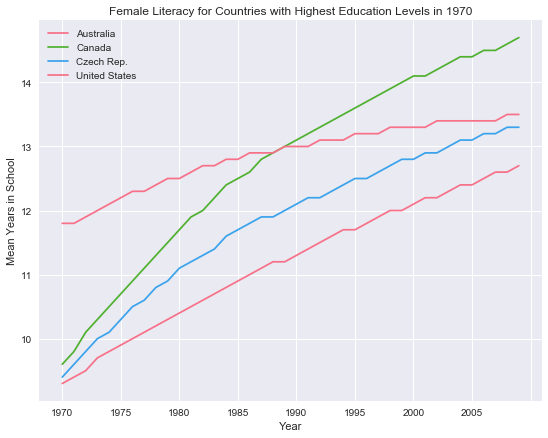

In [581]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots()
# Plot each country group
for name, group in groups:
    group.plot(x='Year', y='MeanYearsInSchool', ax=ax, label=name, figsize=(9,7))

# Limit tick labels to 10 
plt.locator_params(axis='x', nbins=10)
ax.xaxis.set(ticklabels=np.arange(1965, 2010, 5))

ax.legend()
plt.title('Female Literacy for Countries with Highest Education Levels in 1970')
plt.ylabel('Mean Years in School')

### Bottom 5 Countries in 1970
Similarly, we're looking at how the education levels have changed over time in countries with the lowest education in 1970.

In [582]:
# Extract bottom 5 countries with highest education levels in 1970
lowestEdu = melted_school.query("Year == '1970'").nsmallest(4,'MeanYearsInSchool')

# Extract all rows where country is one of bottom 5 countries
lowestEdu_df = melted_school.loc[melted_school['Country'].isin(lowestEdu['Country'])]

# Group data
groups = lowestEdu_df.groupby('Country')

The increases in all bottom countries insignificant in terms of absolute increase in number of years. Afghanistan had the greatest increase of about 1.5 years over four decades. Even though the increase is a promising sign, more efforts must be made to observe more significant changes. 

The next analysis looks closer at countries that have had the highest or lowest changes in education of females. 

Text(0,0.5,'Mean Years in School')

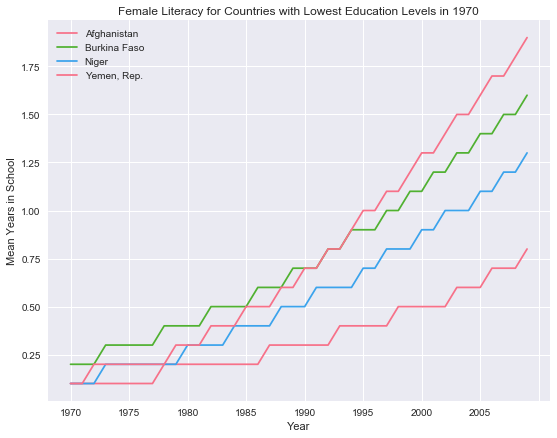

In [583]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots()
# Plot each country group
for name, group in groups:
    group.plot(x='Year', y='MeanYearsInSchool', ax=ax, label=name, figsize=(9,7))

# Limit tick labels to 10 
plt.locator_params(axis='x', nbins=10)
ax.xaxis.set(ticklabels=np.arange(1965, 2010, 5))

ax.legend()
plt.title('Female Literacy for Countries with Lowest Education Levels in 1970')
plt.ylabel('Mean Years in School')

The increases in all bottom countries insignificant in terms of absolute increase in number of years. Yemen had the greatest increase of about 1.5 years over four decades. Even though the increase is a promising sign, more efforts must be made to observe more significant changes. 

The next analysis looks closer at countries that have had the highest or lowest changes in education of females. 

### Differences in Education from 1970 to 2009
An interesting analysis of countries that have had the greatest increases or decreases in education over the past four decades. 

A new column is created which calculates the difference in number of years between 2009 and 1970.

In [584]:
# Create new column of difference in mean years between 2009 and 1970
df_school['Diff'] = df_school["2009"] - df_school["1970"]
df_diff = df_school.loc[:, ['Country', 'Diff']]

df_diff.head()

,Country,Diff
0,Afghanistan,0.7
1,Albania,5.1
2,Algeria,5.7
3,Angola,3.6
4,Antigua and Barbuda,5.4


In [593]:
# Extract bottom 5 countries with highest education levels in 1970
diffEdu = df_diff.nlargest(30,'Diff')

# Extract all rows where country is one of bottom 5 countries
diffEdu_df = melted_school.loc[melted_school['Country'].isin(diffEdu['Country'])]

# Group data
groups = diffEdu_df.groupby('Country')
print(diffEdu)
df_diff.describe()

                    Country  Diff
150                  Taiwan   8.7
77                   Jordan   8.6
163    United Arab Emirates   8.5
11                  Bahrain   8.1
171      West Bank and Gaza   7.9
94                 Malaysia   7.9
99                Mauritius   7.6
86                  Lebanon   7.4
124                   Qatar   7.4
81              Korea, Rep.   7.3
64                   Guyana   7.3
142                   Spain   7.2
131            Saudi Arabia   7.1
38                  Croatia   7.0
80                 Kiribati   7.0
146               Swaziland   7.0
114                  Norway   6.9
129                   Samoa   6.8
115                    Oman   6.8
120                    Peru   6.7
137         Slovak Republic   6.7
44           Dominican Rep.   6.7
79                    Kenya   6.7
134              Seychelles   6.5
40                   Cyprus   6.5
18   Bosnia and Herzegovina   6.5
70                     Iran   6.5
82                   Kuwait   6.4
100           

,Diff
count,175.000000
mean,4.973143
std,1.608104
min,0.700000
25%,4.050000
50%,5.100000
75%,6.100000
max,8.700000


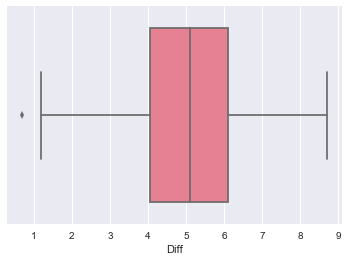

In [596]:
sns.boxplot(x='Diff', data=df_diff)

United States had the highest education for females in 1970 but the rate of increase has been considerably slower since then. Increasing costs of higher education is a potential factor in the slow increase. An interesting question to explore for readers would be to explore the relationship between tuition costs and years in school. 

However, female education in Canada has increased at a much greater pace with females having about one more mean year of education compared to United States. 

Australia and Czech Republic have both seen a greater increase than United States. 

Text(0,0.5,'Mean Years in School')

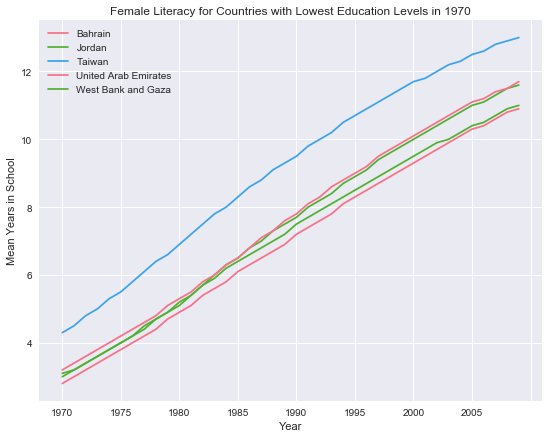

In [589]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots()
# Plot each country group
for name, group in groups:
    group.plot(x='Year', y='MeanYearsInSchool', ax=ax, label=name, figsize=(9,7))

# Limit tick labels to 10 
plt.locator_params(axis='x', nbins=10)
ax.xaxis.set(ticklabels=np.arange(1965, 2010, 5))

ax.legend()
plt.title('Female Literacy for Countries with Lowest Education Levels in 1970')
plt.ylabel('Mean Years in School')

In [ ]:
#plt.bar(locations, heights, tick_label=labels)
#plt.title('Average Quality Rating by pH Levels')
#plt.xlabel('pH Levels')
#plt.ylabel('Average Quality Rating')

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!